In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Import the function

import os

import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Load your dataset here
df = pd.read_csv('MSCId.csv')  # Example DataFrame creation (remove this part if you already have df)

In [ ]:
df.info()
df.shape
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2937 non-null   object 
 1   Price     2937 non-null   float64
 2   Open      2937 non-null   float64
 3   High      2937 non-null   float64
 4   Low       2937 non-null   float64
 5   Vol.      0 non-null      float64
 6   Change %  2937 non-null   object 
dtypes: float64(5), object(2)
memory usage: 160.7+ KB
<bound method NDFrame.head of             Date   Price    Open    High     Low  Vol. Change %
0     05/31/2024  267.81  264.29  268.38  264.29   NaN    1.41%
1     05/30/2024  264.08  264.41  266.12  263.55   NaN   -0.05%
2     05/29/2024  264.22  267.28  267.89  263.94   NaN   -1.16%
3     05/27/2024  267.33  269.16  269.87  267.24   NaN   -0.71%
4     05/24/2024  269.23  266.32  270.05  266.32   NaN    1.34%
...          ...     ...     ...     ...     ...   ...      ...
2932  07/23

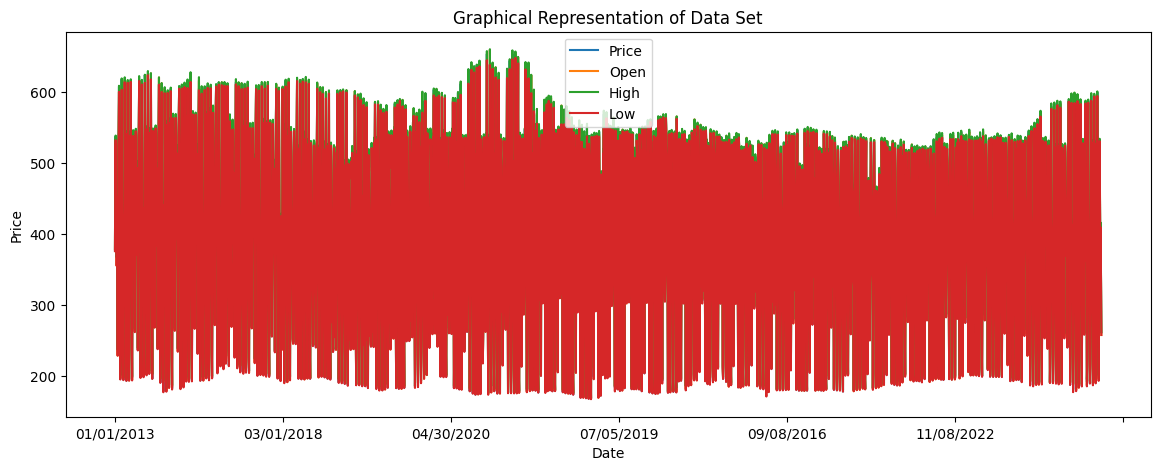

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data, specifying 'Date' as the index
data = pd.read_csv('/content/MSCId.csv', index_col='Date')  # Replace with your actual file path

# Assuming your data has price data in a column named 'Price'
df = data[['Price', 'Open', 'High', 'Low']]

# Sort the data by date in ascending order
df = df.sort_values(by='Date', ascending=True)  # Sorts by 'Date' column in ascending order

# Plot the data with desired figure size and labels
df.plot(figsize=(14, 5))
plt.title('Graphical Representation of Data Set')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


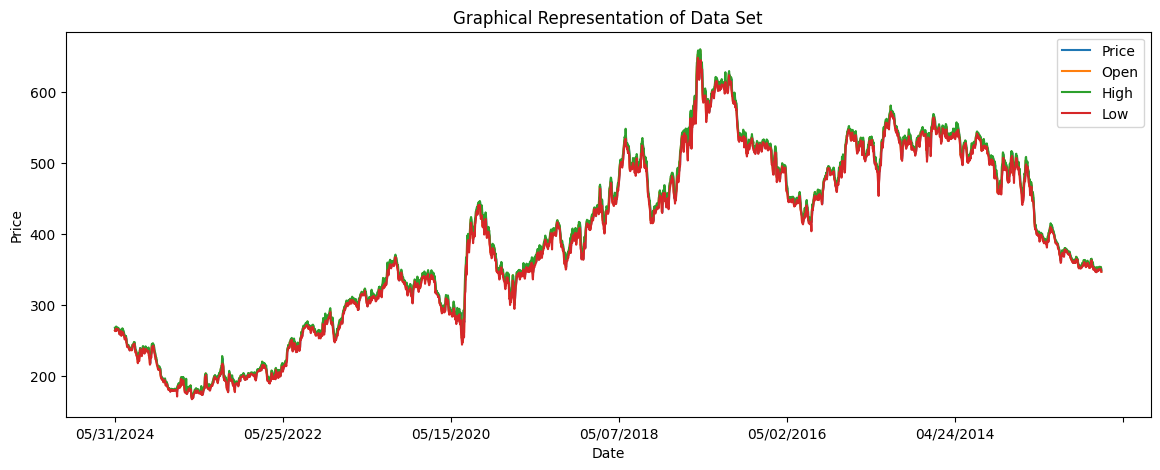

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data, specifying 'Date' as the index
data = pd.read_csv('/content/MSCId.csv', index_col='Date')  # Replace with your actual file path

# Assuming your data has price data in a column named 'Price'
df = data[['Price', 'Open', 'High', 'Low']]

# Plot the data with desired figure size and labels
df.plot(figsize=(14, 5))
plt.title('Graphical Representation of Data Set')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# pre proces
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Load your data
data = pd.read_csv('/content/MSCId.csv')  # Replace with your actual file path

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Extract relevant columns and reset index
data = data[['Date', 'Price']]
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

# Prepare the data for GRU
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for GRU
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# bulding and traninig
# Build the GRU model
model = Sequential()
model.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.15))
model.add(GRU(units=100, return_sequences=False))
model.add(Dropout(0.15))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
58/58 [==============================] - 12s 132ms/step - loss: 0.0243 - val_loss: 0.0022
Epoch 2/50
58/58 [==============================] - 5s 90ms/step - loss: 0.0024 - val_loss: 3.2174e-04
Epoch 3/50
58/58 [==============================] - 7s 119ms/step - loss: 0.0022 - val_loss: 1.5289e-04
Epoch 4/50
58/58 [==============================] - 5s 91ms/step - loss: 0.0019 - val_loss: 2.1193e-04
Epoch 5/50
58/58 [==============================] - 7s 113ms/step - loss: 0.0016 - val_loss: 1.3893e-04
Epoch 6/50
58/58 [==============================] - 5s 91ms/step - loss: 0.0017 - val_loss: 1.2993e-04
Epoch 7/50
58/58 [==============================] - 6s 95ms/step - loss: 0.0014 - val_loss: 1.9654e-04
Epoch 8/50
58/58 [==============================] - 7s 113ms/step - loss: 0.0014 - val_loss: 1.3271e-04
Epoch 9/50
58/58 [==============================] - 5s 91ms/step - loss: 0.0013 - val_loss: 1.3976e-04
Epoch 10/50
58/58 [==============================] - 7s 118ms/step - los

 4/18 [=====>........................] - ETA: 0s

<ipython-input-25-741839d16f52>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


18/18 [==============================] - 0s 25ms/step


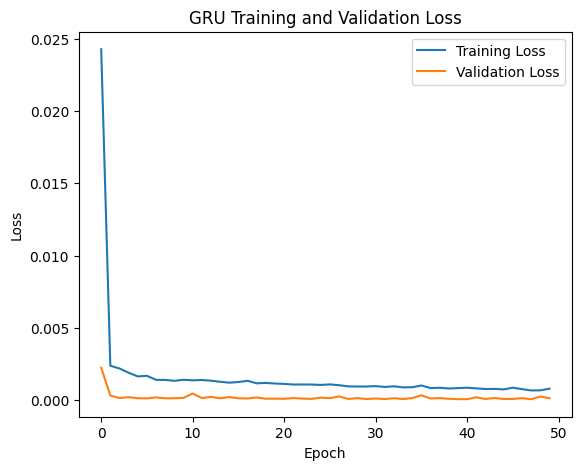

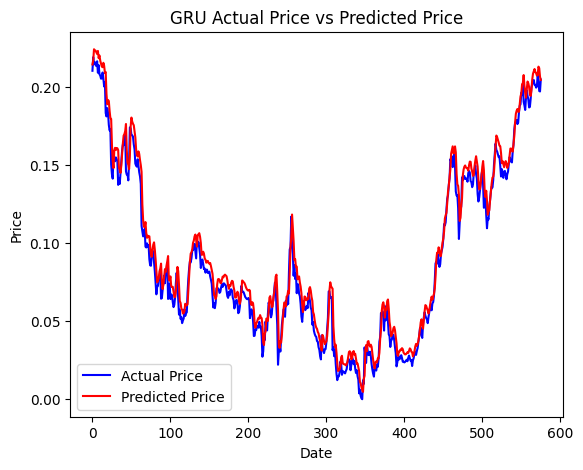

In [ ]:
# Plotting training and actual price graphs
plt.figure(figsize=(14, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the predictions (training data with actual dates)
plt.figure(figsize=(14, 5))
plt.plot(data.index[sequence_length:split + sequence_length], df['Price'][sequence_length:split + sequence_length], label='True Train Data')

# Plot actual price and predicted price for the test data
plt.subplot(1, 2, 2)
plt.plot(y_test, color='blue', label='Actual Price')
test_predict = model.predict(X_test)
plt.plot(test_predict, color='red', label='Predicted Price')
plt.title('GRU Actual Price vs Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

72/72 [==============================] - 3s 25ms/step


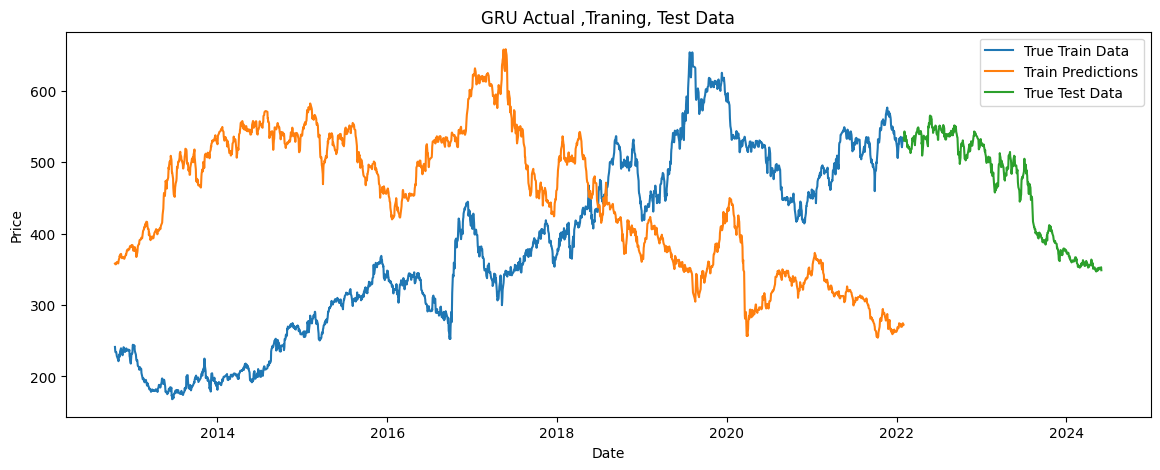

In [ ]:
# Plotting the predictions (training data with actual dates)
plt.figure(figsize=(14, 5))
plt.plot(data.index[sequence_length:split + sequence_length], df['Price'][sequence_length:split + sequence_length], label='True Train Data')

# Predicting the prices
train_predict = model.predict(X_train)

# Assuming you predict training prices (replace with your prediction variable)
train_predict_inverse = scaler.inverse_transform(train_predict.reshape(-1, 1))
plt.plot(data.index[sequence_length:split + sequence_length], train_predict_inverse, label='Train Predictions')

plt.plot(data.index[split + sequence_length:], df['Price'][split + sequence_length:], label='True Test Data')
plt.title('GRU Actual ,Traning, Test Data')
plt.xlabel('Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# evaluating the model
# Predicting the prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE, RMSE
mse = np.mean((predicted_prices - actual_prices) ** 2)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


18/18 [==============================] - 0s 25ms/step
MSE: 16.68446111438445
RMSE: 4.084661689097942


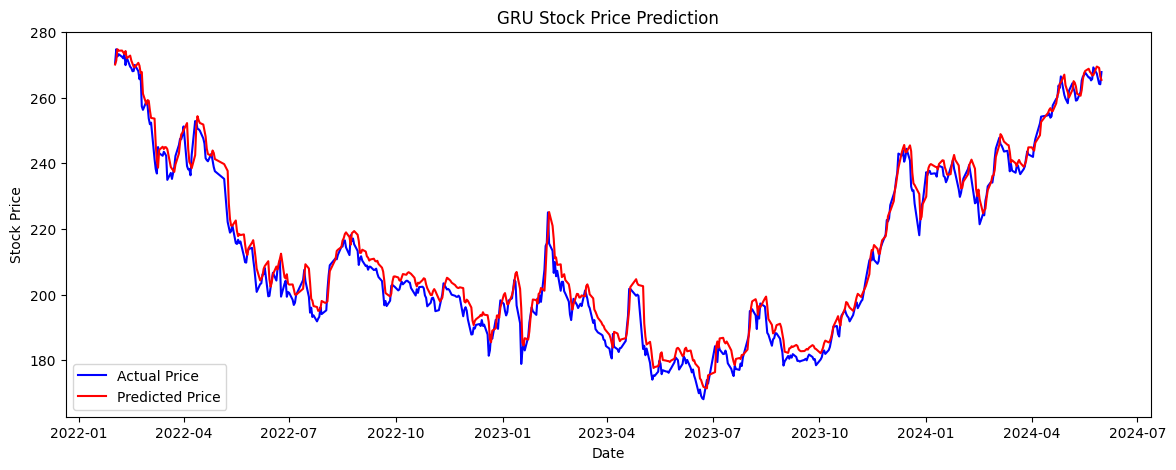

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(actual_prices):], actual_prices, color='blue', label='Actual Price')
plt.plot(data.index[-len(predicted_prices):], predicted_prices, color='red', label='Predicted Price')
plt.title('GRU Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': data.index[-len(actual_prices):],
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten()
})

# Display the comparison table
print(comparison_df)

# Save to CSV if needed
comparison_df.to_csv('comparison_table.csv', index=False)


          Date  Actual Price  Predicted Price
0   2022-02-01        270.52       270.109192
1   2022-02-02        274.76       271.286743
2   2022-02-03        272.54       274.762146
3   2022-02-04        273.26       274.320312
4   2022-02-07        272.45       274.349823
..         ...           ...              ...
571 2024-05-24        269.23       266.852692
572 2024-05-27        267.33       269.486786
573 2024-05-29        264.22       269.084991
574 2024-05-30        264.08       266.449341
575 2024-05-31        267.81       265.428619

[576 rows x 3 columns]


In [ ]:
#Step 1: Preprocessing the Data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load your data
data = pd.read_csv('/content/MSCId.csv')  # Replace with your actual file path

# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date
data = data.sort_values('Date')

# Extract relevant columns and reset index
data = data[['Date', 'Price']]
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Price'].values.reshape(-1, 1))

# Prepare the data for LSTM
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.15))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.15))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)




Epoch 1/50
58/58 [==============================] - 12s 135ms/step - loss: 0.0265 - val_loss: 0.0057
Epoch 2/50
58/58 [==============================] - 6s 96ms/step - loss: 0.0031 - val_loss: 8.8476e-04
Epoch 3/50
58/58 [==============================] - 7s 124ms/step - loss: 0.0026 - val_loss: 4.1300e-04
Epoch 4/50
58/58 [==============================] - 6s 96ms/step - loss: 0.0021 - val_loss: 4.0573e-04
Epoch 5/50
58/58 [==============================] - 7s 122ms/step - loss: 0.0022 - val_loss: 3.6939e-04
Epoch 6/50
58/58 [==============================] - 6s 95ms/step - loss: 0.0020 - val_loss: 4.2527e-04
Epoch 7/50
58/58 [==============================] - 6s 108ms/step - loss: 0.0020 - val_loss: 6.1206e-04
Epoch 8/50
58/58 [==============================] - 6s 108ms/step - loss: 0.0019 - val_loss: 3.2858e-04
Epoch 9/50
58/58 [==============================] - 6s 96ms/step - loss: 0.0019 - val_loss: 3.1467e-04
Epoch 10/50
58/58 [==============================] - 7s 119ms/step - lo

In [ ]:
# Predicting the prices
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Actual prices
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MSE, RMSE
mse = np.mean((predicted_prices - actual_prices) ** 2)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


18/18 [==============================] - 3s 36ms/step
MSE: 52.92878783715122
RMSE: 7.275217373876276


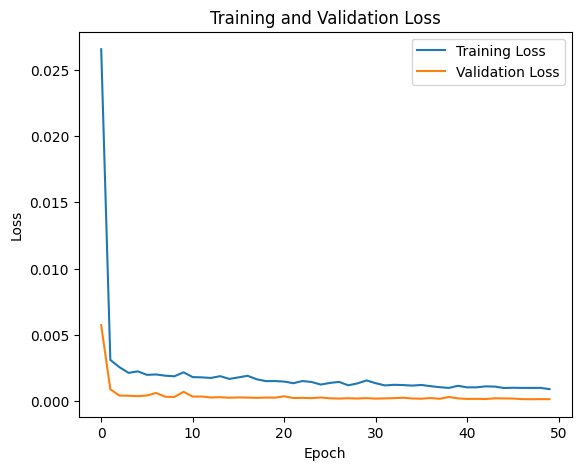

In [ ]:
# Plotting training and actual price graphs
plt.figure(figsize=(14, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

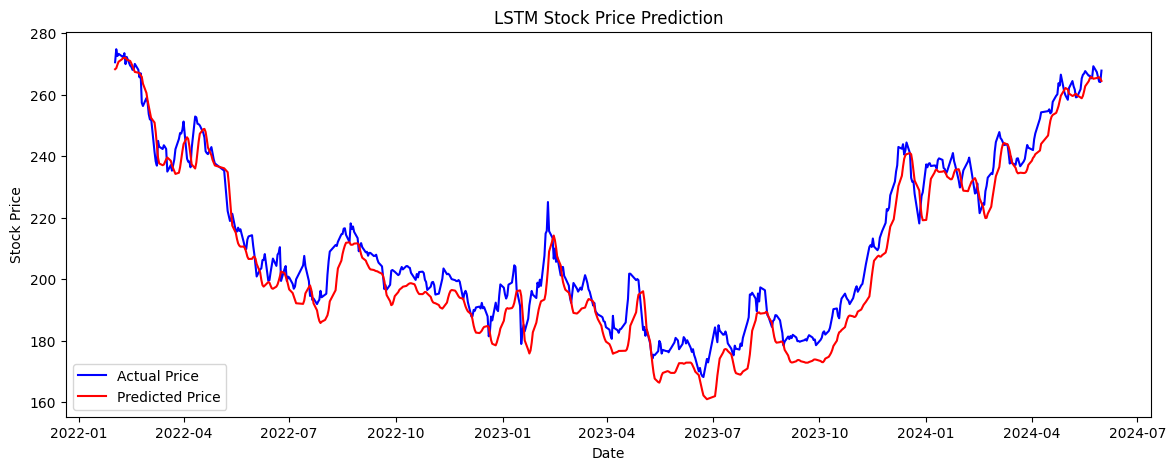

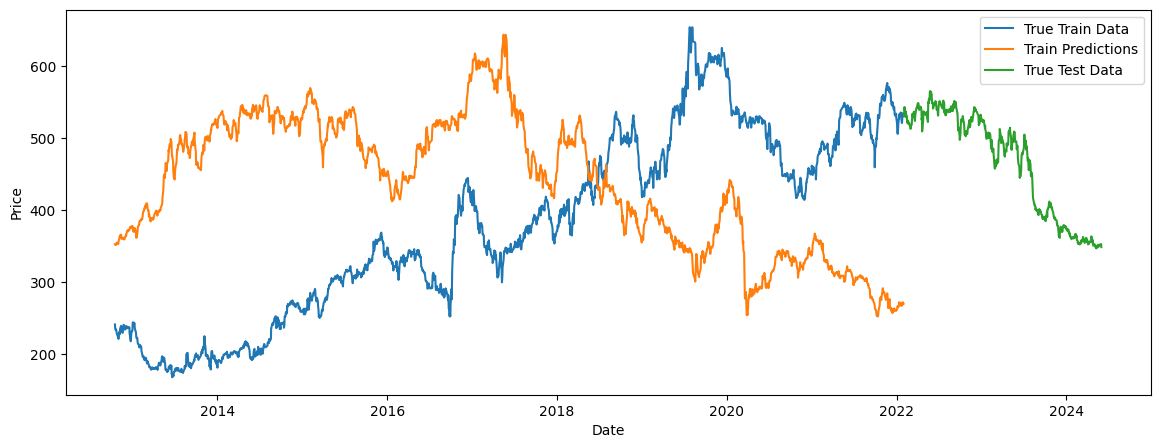

In [ ]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[-len(actual_prices):], actual_prices, color='blue', label='Actual Price')
plt.plot(data.index[-len(predicted_prices):], predicted_prices, color='red', label='Predicted Price')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plotting the predictions (training data with actual dates)
plt.figure(figsize=(14, 5))
plt.plot(data.index[sequence_length:split + sequence_length], df['Price'][sequence_length:split + sequence_length], label='True Train Data')

# Assuming you predict training prices (replace with your prediction variable)
train_predict_inverse = scaler.inverse_transform(train_predict.reshape(-1, 1))
plt.plot(data.index[sequence_length:split + sequence_length], train_predict_inverse, label='Train Predictions')

plt.plot(data.index[split + sequence_length:], df['Price'][split + sequence_length:], label='True Test Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': data.index[-len(actual_prices):],
    'Actual Price': actual_prices.flatten(),
    'Predicted Price': predicted_prices.flatten()
})

# Display the comparison table
print(comparison_df)

# Save to CSV if needed
comparison_df.to_csv('comparison_table.csv', index=False)


          Date  Actual Price  Predicted Price
0   2022-02-01        270.52       268.265289
1   2022-02-02        274.76       268.590637
2   2022-02-03        272.54       269.725281
3   2022-02-04        273.26       270.696869
4   2022-02-07        272.45       271.518097
..         ...           ...              ...
571 2024-05-24        269.23       265.150177
572 2024-05-27        267.33       265.409851
573 2024-05-29        264.22       265.657227
574 2024-05-30        264.08       265.235107
575 2024-05-31        267.81       264.460022

[576 rows x 3 columns]
